### Student Exam Performance

I use generated data, which includes scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them to understand how these variables impact students performance.

The dataset is obtained from [Royce Kimmons](http://roycekimmons.com/tools/generated_data/exams) and consists of generated samples for 1000 students.  

In [54]:
# import relevant libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from matplotlib.ticker import FormatStrFormatter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

warnings.simplefilter(action='ignore', category=FutureWarning)

Read data from the csv file

In [2]:
path = './students-performance-in-exams/StudentsPerformance.csv'
df = pd.read_csv(path, sep=',')


Print title rows to understand the data columns


In [55]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,passed_math,passed_reading,passed_writing,total_marks,percentage,passed_all,letter_grade
999,female,group D,some college,free/reduced,none,77,86,86,Passed,Passed,Passed,249,83.000000,Passed,A
469,male,group C,some college,standard,none,91,74,76,Passed,Passed,Passed,241,80.333333,Passed,A
373,female,group D,some college,standard,completed,82,97,96,Passed,Passed,Passed,275,91.666667,Passed,A
546,female,group A,some high school,standard,completed,92,100,97,Passed,Passed,Passed,289,96.333333,Passed,A
781,female,group B,master's degree,standard,none,77,90,84,Passed,Passed,Passed,251,83.666667,Passed,A



Check for any missing values


In [56]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
passed_math                    0
passed_reading                 0
passed_writing                 0
total_marks                    0
percentage                     0
passed_all                     0
letter_grade                   0
dtype: int64

Let's explore the data test scores

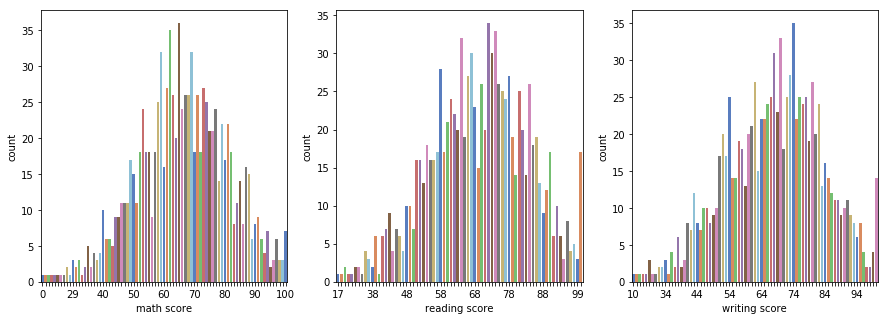

In [57]:
f, axes = plt.subplots(1, 3, figsize=(15,5))

ax = sns.countplot(x="math score", data = df, palette="muted", ax=axes[0])


ax = sns.countplot(x="reading score", data = df, palette="muted", ax=axes[1])

ax = sns.countplot(x="writing score", data = df, palette="muted", ax=axes[2])

for ax in axes:
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 10 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)


Let's see many students passed each test based on parental level of education


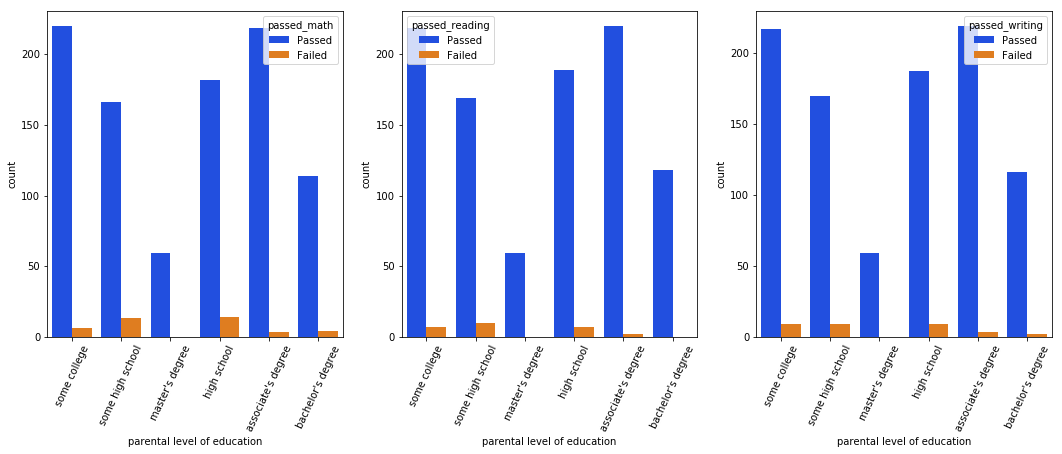

In [58]:
df['passed_math'] = np.where(df['math score']<40, 'Failed', 'Passed')
df['passed_reading'] = np.where(df['reading score']<40, 'Failed', 'Passed')
df['passed_writing'] = np.where(df['writing score']<40, 'Failed', 'Passed')


f, axes = plt.subplots(1, 3, figsize=(18,6))

ax = sns.countplot(x='parental level of education',
                   data = df, hue='passed_math', palette='bright', ax=axes[0])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=65);

ax = sns.countplot(x='parental level of education',
                   data = df, hue='passed_reading', palette='bright', ax=axes[1])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=65);

ax = sns.countplot(x='parental level of education',
                   data = df, hue='passed_writing', palette='bright', ax=axes[2])

plt.setp(ax.xaxis.get_majorticklabels(), rotation=65);


Let's visualise overall percentage of marks for the three subjects


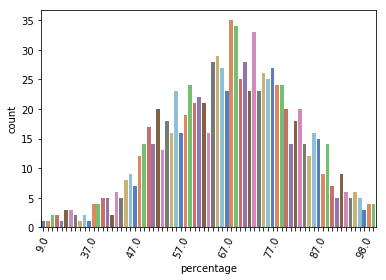

In [59]:
df['total_marks'] = df['math score']+df['reading score']+df['writing score']
df['percentage'] = df['total_marks']/3

p = sns.countplot(x="percentage", data = round(df), palette="muted")
plt.setp(p.get_xticklabels(), rotation=65) 

for ind, label in enumerate(p.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


Let's see how many students passed all subject tests based on parental level of education


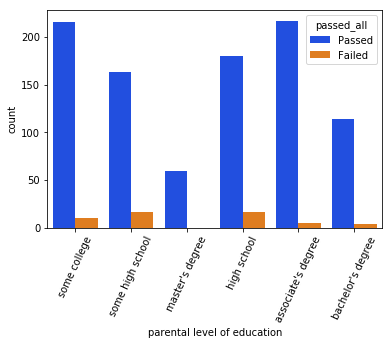

In [60]:
df['passed_all'] = df.apply(lambda x : 'Failed' if x['passed_math'] == 'Failed' or 
                                    x['passed_reading'] == 'Failed' or
                                    x['passed_writing'] == 'Failed' else 
                                    'Passed', axis =1)

p = sns.countplot(x='parental level of education', 
                  data = df, hue='passed_all', palette='bright')
plt.setp(p.get_xticklabels(), rotation=65);


Let's assign letter grades and visualise them:
<br><br>
* above 80 = A
* 70 to 80  = B
* 60 to 70  = C
* 50 to 60  = D
* 40 to 50  = E
* below 40  = F


A    198
B    261
C    256
D    178
E     56
F     51
Name: letter_grade, dtype: int64

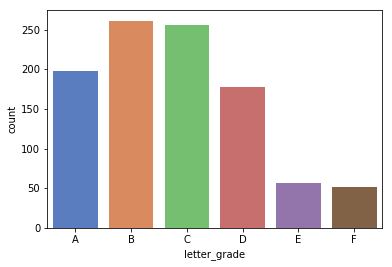

In [61]:
def get_letter_grade(percentage, passed_all):
    if ( passed_all == 'Failed'):
        return 'F'    
    if ( percentage >= 80 ):
        return 'A'
    if ( percentage >= 70):
        return 'B'
    if ( percentage >= 60):
        return 'C'
    if ( percentage >= 50):
        return 'D'
    if ( percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['letter_grade'] = df.apply(lambda x :
                              get_letter_grade(x['percentage'], x['passed_all']), axis=1)

display(df.letter_grade.value_counts().sort_index())

sns.countplot(x="letter_grade", data = df, order=['A','B','C','D','E','F'],  palette="muted");


Let's see if parental level of education could be used to predict the overall grade


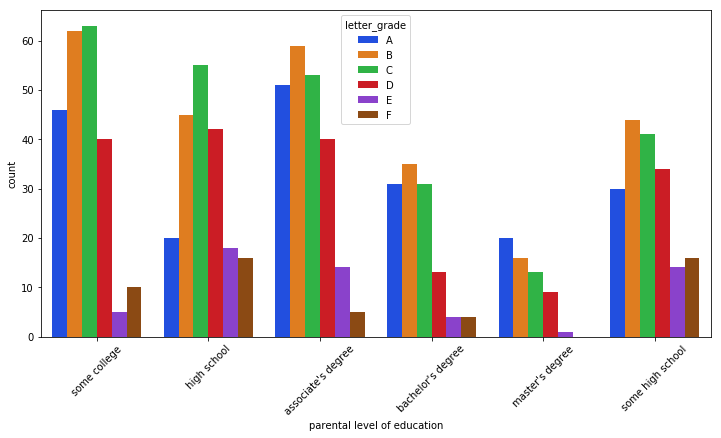

In [62]:
df.sort_values(("letter_grade"), inplace=True)

f, ax = plt.subplots(1, 1, figsize=(12,6))
p = sns.countplot(x='parental level of education',
                  data = df, hue='letter_grade', palette='bright', ax=ax);

plt.setp(p.get_xticklabels(), rotation=45);


How about gender?


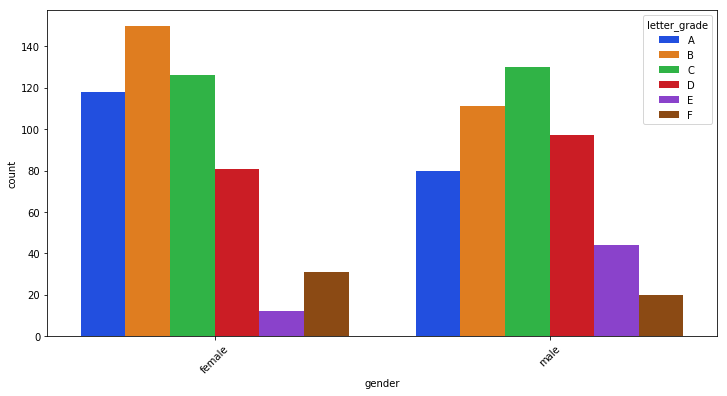

In [63]:
df.sort_values(("letter_grade"), inplace=True)

f, ax = plt.subplots(1, 1, figsize=(12,6))
p = sns.countplot(x='gender',
                  data = df, hue='letter_grade', palette='bright', ax=ax);

plt.setp(p.get_xticklabels(), rotation=45);


How about race/ethnicity?


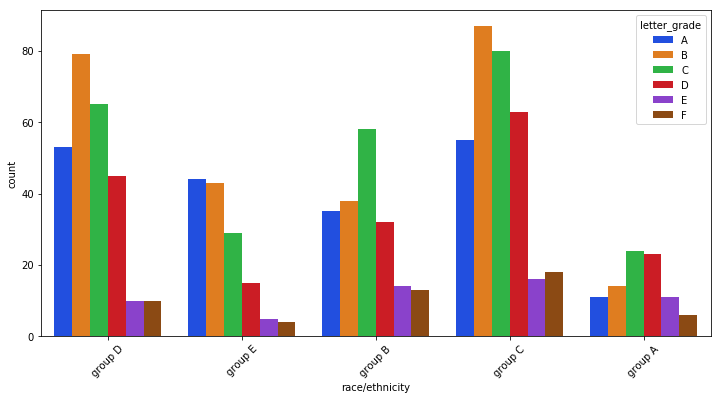

In [64]:
df.sort_values(("letter_grade"), inplace=True)

f, ax = plt.subplots(1, 1, figsize=(12,6))
p = sns.countplot(x='race/ethnicity',
                  data = df, hue='letter_grade', palette='bright', ax=ax);

plt.setp(p.get_xticklabels(), rotation=45);


How about lunch meal status?


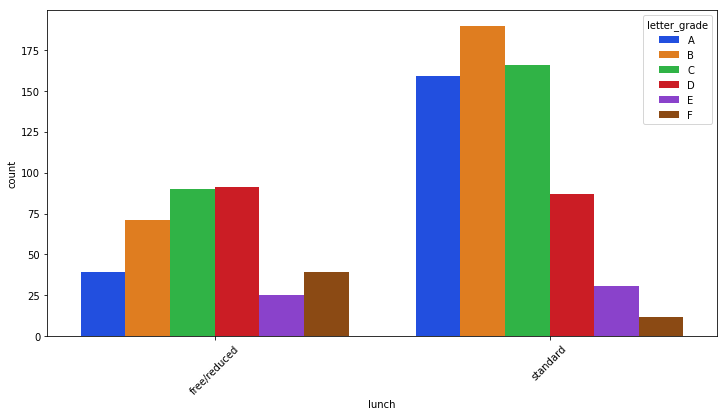

In [65]:
df.sort_values(("letter_grade"), inplace=True)

f, ax = plt.subplots(1, 1, figsize=(12,6))
p = sns.countplot(x='lunch',
                  data = df, hue='letter_grade', palette='bright', ax=ax);

plt.setp(p.get_xticklabels(), rotation=45);


And finally, let's see if completion of the test preparation course affectd the students' grades


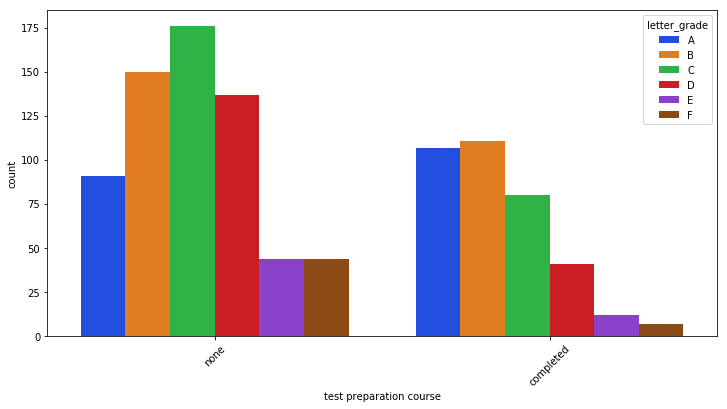

In [66]:
df.sort_values(("letter_grade"), inplace=True)

f, ax = plt.subplots(1, 1, figsize=(12,6))
p = sns.countplot(x='test preparation course',
                  data = df, hue='letter_grade', palette='bright', ax=ax);

plt.setp(p.get_xticklabels(), rotation=45);


I'll now use the Random Forest Classifier to get the feature importance of each feature in the dataset (see [Stacey's great blogpost](https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3?gi=6620863fb1a3) for more information on Random Forests).

Feature importance gives a score for each feature of the data, the higher the score the more important or relevant the feature is towards the output variable.


In [67]:
# let's make the dataframe with the variables we want to analyse
df_reduced = (df[['gender', 'race/ethnicity', 'lunch', 
                  'test preparation course','parental level of education', 'passed_all']])

# let's change each value for the features from a string to an integer value 
df_reduced = df_reduced.replace({'gender':
                                {'male':0,
                                 'female':1}})

df_reduced = df_reduced.replace({'race/ethnicity': 
                                {'group A':0,'group B':1,
                                 'group C':2,'group D':3,
                                 'group E':4}})

df_reduced = df_reduced.replace({'parental level of education':
                                {'some high school':0,
                                 'high school':1, 'some college':2,
                                 'associate\'s degree':3, 'bachelor\'s degree':4,
                                 'master\'s degree':5 }})

df_reduced = df_reduced.replace({'lunch':
                                {'free/reduced':0,
                                 'standard':1}})

df_reduced = df_reduced.replace({'test preparation course':
                                {'none':0,
                                 'completed':1}})

df_reduced = df_reduced.replace({'passed_all':
                                {'Failed':0, 'Passed':1}})

# display the new dataframe
df_reduced

,gender,race/ethnicity,lunch,test preparation course,parental level of education,passed_all
999,1,3,0,0,2,1
38,1,3,0,1,3,1
35,0,4,1,1,3,1
938,0,3,1,1,2,1
946,0,1,1,0,1,1
...,...,...,...,...,...,...
76,0,4,1,0,0,0
66,0,3,0,0,0,0
424,0,1,0,0,2,0
810,0,0,1,0,0,0


In [68]:
# make independent columns (variables)
X = (df_reduced[['gender', 'race/ethnicity', 'lunch', 
                 'test preparation course', 'parental level of education']].values)

# make target column (whether student passed or failed)
y = df_reduced['passed_all'].values

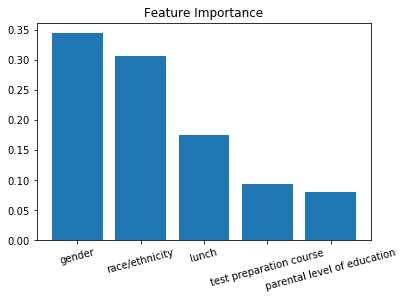

In [69]:
# create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# train model
model = clf.fit(X, y)

# calculate feature importances
importances = model.feature_importances_


# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# rearrange feature names so they match the sorted feature importances
names = (['gender', 'race/ethnicity', 'lunch',
          'test preparation course', 'parental level of education'])

# create plot
plt.figure()

# create plot title
plt.title("Feature Importance")

# add bars
plt.bar(range(X.shape[1]), importances[indices])

# add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=15)

# show plot
plt.show()


From the feature importance plot we find that every variable plays a role in predicting whether a student will pass or fail. The gender and race/ethnicity variables play the biggest roles, while lunch, test preparation course completion, and parental level of education play much smaller roles
